In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAW.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (39,40,41,43,44,45,47,48,49,51,52,53,55,56,57,59,60,61,63,64,65,67,68,69,71,72,73,75,76,77,79,80,81,83,84,85,87,88,89,91,92,93,95,96,97,99,100,101,103,104,105,107,108,109,111,112,113,115,116,117,119,120,121,123,124,125,127,128,129,131,132,133,135,136,137,139,140,141,143,144,145,147,148,149,151,152,153,155,156,157,159,160,161,163,164,165,167,168,169,171,172,173,190,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ontopic=np.fromfile('../data/bbReplyBothSidesKeywordTweets.csv', sep=',')

In [4]:
len(ontopic)

157162

In [5]:
def tweetSet(row):
    chain=set()
    for i in xrange(44):
        colName='tweet'+str(i)
        if str(row[colName])!='0':
            chain=chain | set([row[colName]])
    return list(chain)

In [6]:
convs['allTweets']=convs.apply(tweetSet, axis=1)

In [7]:
convs['ontopicConvo']=convs.allTweets.apply(lambda x: 1 if len(set(x) & set(ontopic))>0 else 0)

In [16]:
len(convs[convs.ontopicConvo==1])

564

In [9]:
len(convs[convs.ontopicConvo==0])

4715

In [10]:
564+4715

5279

In [17]:
len(convs[convs.ontopicConvo==1])/float(len(convs))

0.10683841636673612

* So overall, **11%** of conversations are ontopic

# Break down ontopic by Time

In [11]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [12]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [13]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [14]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [18]:
len(before[before.ontopicConvo==1])/float(len(before))

0.0

In [19]:
len(during[during.ontopicConvo==1])/float(len(during))

0.20927984533591107

In [20]:
len(after[after.ontopicConvo==1])/float(len(after))

0.0696551724137931

In [21]:
len(lafter[lafter.ontopicConvo==1])/float(len(lafter))

0.026166097838452786

In [23]:
len(before[before.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.0

In [24]:
len(during[during.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.7677304964539007

In [25]:
len(after[after.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.17907801418439717

In [26]:
len(lafter[lafter.ontopicConvo==1])/float(len(convs[convs.ontopicConvo==1]))

0.040780141843971635

**Takeway:**
* So the ontopic tweets are overrepresented during
* they comprise 21% of during tweets
* And underrepresnted after and long after - 7% adn 3%
* Very inuitive
* In a more understandble way: 77% of all ontopic tweets happen during, 18% happen after, and 4% happen long after

## Conversation size, length, and tempo for ontopic vs offtopic conversations

In [27]:
np.median(convs.convSize[convs.ontopicConvo==1])

2.0

In [30]:
np.median(convs.convSize[convs.ontopicConvo==0])

2.0

In [29]:
np.percentile(convs.convSize[convs.ontopicConvo==1], 90)

4.6999999999999886

In [31]:
np.percentile(convs.convSize[convs.ontopicConvo==0], 90)

4.0

In [32]:
np.median(convs.convoLen[convs.ontopicConvo==1])

816.0

In [33]:
np.median(convs.convoLen[convs.ontopicConvo==0])

712.0

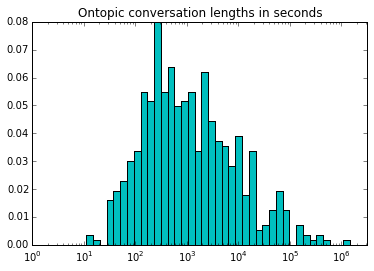

In [37]:
convoLen = convs.convoLen[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Ontopic conversation lengths in seconds')

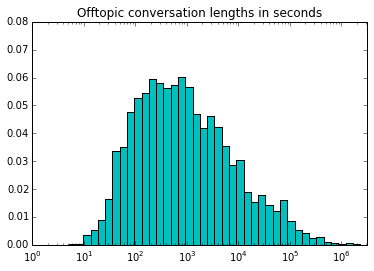

In [35]:
convoLen = convs.convoLen[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Offtopic conversation lengths in seconds')

In [38]:
np.median(convs.medianReplyTime[convs.ontopicConvo==1])

480.0

In [39]:
np.median(convs.medianReplyTime[convs.ontopicConvo==0])

428.0

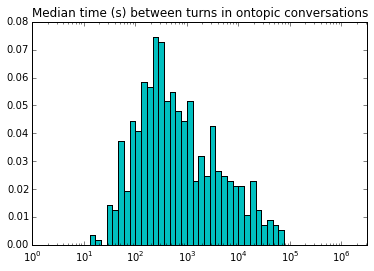

In [40]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in ontopic conversations')

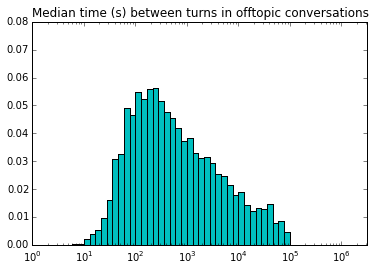

In [41]:
medRepTime=convs.medianReplyTime[convs.ontopicConvo==0].dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in offtopic conversations')

**Takeways:**
* So ontopic conversations have slightly more steps than offtopic converstions (90%=4.7 vs 4.0)
* The conversations are also longer time wise - median convo length of 816s vs 712s for offtopic
* The distribution of the convo length seems to be a bit more long tailed for ontopic
* The median inter-reply time also seems to be a bit longer in ontopic tweets (median=480s vs 428)
* **Since ontopic conversations are mostly present in the During period - their slower pace and longer duration must be one of the things that contribute to slower pace and longer conversations during**

## Ontopic conversations and user configurations

In [42]:
ontopic=convs[convs.ontopicConvo==1]

In [43]:
offtopic=convs[convs.ontopicConvo==0]

In [44]:
len(ontopic[ontopic.userSetLen==1])/float(len(ontopic))

0.13120567375886524

In [45]:
len(ontopic[ontopic.userSetLen==2])/float(len(ontopic))

0.8209219858156028

In [46]:
len(ontopic[ontopic.userSetLen>2])/float(len(ontopic))

0.047872340425531915

In [48]:
len(ontopic[ontopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.05584905660377359

In [49]:
len(ontopic[ontopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.11976202793585101

In [50]:
len(ontopic[ontopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.3068181818181818

In [51]:
len(offtopic[offtopic.userSetLen==1])/float(len(offtopic))

0.26532343584305407

In [52]:
len(offtopic[offtopic.userSetLen==2])/float(len(offtopic))

0.7217391304347827

In [53]:
len(offtopic[offtopic.userSetLen>2])/float(len(offtopic))

0.012937433722163308

In [54]:
len(offtopic[offtopic.userSetLen==1])/float(len(convs[convs.userSetLen==1]))

0.9441509433962264

In [55]:
len(offtopic[offtopic.userSetLen==2])/float(len(convs[convs.userSetLen==2]))

0.880237972064149

In [56]:
len(offtopic[offtopic.userSetLen>2])/float(len(convs[convs.userSetLen>2]))

0.6931818181818182

**Takeway:**
* Among the ontopic tweets, the one-person convo is underreprested (13% instead of overall 25%)
* And the two-person and man-person conversations are overrepresented
* Conversely, ontopic tweets comprise 12% of all the two-user tweets and **31%** of many-user tweets
* The distribution over the convo types (1, 2,>2 users) for the offtopic tweets is very similar to the overall

## Ontopic/offtopic conversations and high-follower users

In [58]:
len(ontopic[ontopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.08279940857565303

In [59]:
len(ontopic[ontopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.12184615384615384

In [60]:
len(offtopic[offtopic.allHighFollowUsers==0])/float(len(convs[convs.allHighFollowUsers==0]))

0.917200591424347

In [61]:
len(offtopic[offtopic.allHighFollowUsers>0])/float(len(convs[convs.allHighFollowUsers>0]))

0.8781538461538462

**Takeway:**
* Ontopic tweets are slightly more prevalent (12%) in the conversations with some high-follower users
* As opposed to conversations with no high-follower users (9%)
* This makes sense as the ontopic conversations are mostly found During, and the conversations with some high-follower users are also more prevalent During
* I wonder if we could do some sort of co-occurence heatmap or smth?

### Ontopic and high-followers over time

In [84]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers>0)])/float(len(before.allHighFollowUsers>0))

0.0

In [85]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers>0)])/float(len(during.allHighFollowUsers>0))

0.14693088448525857

In [86]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers>0)])/float(len(after.allHighFollowUsers>0))

0.04896551724137931

In [87]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers>0)])/float(len(lafter.allHighFollowUsers>0))

0.019340159271899887

**Takeway:**
* While ontopic conversations are rare among the conversations with some high-follower users overall
* They are much more prevalent During (15%) than After (5%) and LongAfter (2%)


In [88]:
len(before[(before.ontopicConvo==1) & (before.allHighFollowUsers==0)])/float(len(before.allHighFollowUsers==0))

0.0

In [89]:
len(during[(during.ontopicConvo==1) & (during.allHighFollowUsers==0)])/float(len(during.allHighFollowUsers==0))

0.06234896085065249

In [90]:
len(after[(after.ontopicConvo==1) & (after.allHighFollowUsers==0)])/float(len(after.allHighFollowUsers==0))

0.020689655172413793

In [91]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.allHighFollowUsers==0)])/float(len(lafter.allHighFollowUsers==0))

0.006825938566552901

* Not a super dramatic difference b/w During and After/Lafter for conversations with no high-follower users

## Ontopic/offtopic conversations and strong-ties users

In [62]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.1221273801707157

In [63]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.08598298253470667

In [64]:
len(offtopic[offtopic.strongTiesAllUsers<2])/float(len(convs[convs.strongTiesAllUsers<2]))

0.8778726198292843

In [65]:
len(offtopic[offtopic.strongTiesAllUsers>1])/float(len(convs[convs.strongTiesAllUsers>1]))

0.9140170174652933

In [66]:
len(ontopic[ontopic.strongTiesAllUsers<2])/float(len(ontopic))

0.6595744680851063

In [67]:
len(ontopic[ontopic.strongTiesAllUsers>1])/float(len(ontopic))

0.3404255319148936

**Takeway:**
* The ontopic conversations comprise only 12% of conversations with a few (0-1) strong-tie users
* They comprise even less - 9% of the conversations with two or more strong-tie users

### Ontopic and strong-tie over time

In [69]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers>1)])/float(len(before.strongTiesAllUsers>1))

0.0

In [70]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers>1)])/float(len(during.strongTiesAllUsers>1))

0.07008216529724505

In [71]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers>1)])/float(len(after.strongTiesAllUsers>1))

0.025517241379310347

In [72]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers>1)])/float(len(lafter.strongTiesAllUsers>1))

0.007963594994311717

**Takeway:**
* While ontopic conversations are rare among the conversations with many strong-tie users overall
* They are much more prevalent During (7%) of conversations with many strong-tie users that After (3%) and LongAfter (1%)


In [82]:
len(before[(before.ontopicConvo==1) & (before.strongTiesAllUsers<2)])/float(len(before.strongTiesAllUsers<2))

0.0

In [83]:
len(during[(during.ontopicConvo==1) & (during.strongTiesAllUsers<2)])/float(len(during.strongTiesAllUsers<2))

0.13919768003866603

In [75]:
len(after[(after.ontopicConvo==1) & (after.strongTiesAllUsers<2)])/float(len(after.strongTiesAllUsers<2))

0.044137931034482755

In [76]:
len(lafter[(lafter.ontopicConvo==1) & (lafter.strongTiesAllUsers<2)])/float(len(lafter.strongTiesAllUsers<2))

0.01820250284414107

**Takeway:**
* And the same trend is seen among conversations with a few strong-tie users
* While ontopic conversations are much more prevalent During (13%) of conversations with few strong-tie users than After (4%) and LongAfter (4%)
* The ontopic conversations are more prevalent among few stong-tie users than many
* **This makes sense because celebrities and officials, to which many users respond During because they post ontopic information, tend not to be strong-tie users**
